# Esercitazione 14/05/2025
## Fisica Computazionale – gruppo B

**Simulazione prova d'esame**

## **Esercizio 1**

Un piccolo oggetto di massa $m=10\ g$ è sospeso a un filo di lunghezza $L=30\ cm$. L'oggetto ruota con velocità costante $v$ lungo una circonferenza orizzontale di raggio $r$, mentre il filo forma con la verticale un angolo di $30^\circ$. (Poiché il filo descrive la superficie di un cono, il sistema è noto come *pendolo conico*.) 

- Trova il valore di $v$ in unità SI.
- Come cambia il valore di $v$ se la massa raddoppia?


### Soluzione

Per prima cosa è utile disegnare il diagramma di corpo libero, identificando tutte le forze che agiscono sul corpo e considerando il secondo principio della dinamica $\vec{F}=m\vec{a}$. Le forze in gioco sono la forza peso, sempre diretta verticalmente verso il basso, e la tensione del filo, diretta longitudinalmente alla direzione in cui in filo è teso.
$$\vec{T}+\vec{F_p}=ma_c$$
Insomma la somma vettoriale di tensione e forza peso è la forza centripeta che costringe il corpo a seguire un moto circolare uniforme. Questa è una equazione vettoriale che possiamo scomporre in una equazione lungo l'asse $x$ e lungo l'asse $y$, per risolvere nelle due incognite che sono $T$ e $a_c$:
$$x:\quad T \sin\theta = ma_c$$
$$y: \quad T \cos\theta -mg = 0$$
da cui ricaviamo $T=\frac{mg}{\cos\theta}$ e di conseguenza $a_c=g\tan\theta$. Per trovare la velocità basta ricordare che $a_c=\frac{v^2}{r}$ e usare la goniometria per trovare $r=L\sin\theta$:
$$v=\sqrt{gL\tan\theta\sin\theta}=2.9\ m/s$$

## **Esercizio 2**

Un blocco di massa $0.80\ \text{kg}$ viene lanciato con una velocità iniziale $v_A = 1.2\ \text{m/s}$ verso destra e collide con una molla di massa trascurabile e costante elastica $k = 50\ \text{N/m}$.

1. Supponendo che la superficie sia priva di attrito, calcola la compressione massima della molla dopo la collisione.

Supponi ora che tra il blocco e la superficie agisca una forza costante di attrito dinamico, con coefficiente $\mu_d = 0.20$. 

2. Se la velocità del blocco <u>nel momento in cui collide con la molla</u> è $v_A = 1.2\ \text{m/s}$, qual è la compressione massima $x_C$ della molla?

3. In quale posizione si fermerà il corpo?

4. Simula il moto del corpo con l'algoritmo di Eulero, facendo un grafico di posizione, velocità ed energia e confronta i risultati con quelli ottenuti analiticamente.



### Soluzione

Uguagliamo l'energia meccanica nell'istante iniziale A e nel punto di massima compressione B:
$$\frac{1}{2}mv_A^2 = \frac{1}{2}k (x_C-\cancel{x_0})^2 $$
dove $x_0$ è la posizione di riposo della molla, che poniamo per comodità nell'origine dell'asse $x$:
$$x_C=\sqrt{\frac{mv_A^2}{k}}=0.15\ m$$
Se vogliamo considerare l'attrito ci basta aggiungere imporre che il lavoro (negativo!) delle forze non conservative sia uguale alla variazione di energia meccanica:
$$E_f-E_i = L_{nc}$$
$$\frac{1}{2}mv_A^2 - \mu_d mg x_C= \frac{1}{2}k x_C^2 $$
$$\frac{1}{2}0.8\cdot 1.2^2 - 0.2 \cdot 0.8 \cdot 9.8 x_C= \frac{1}{2}50 x_C^2 $$
Sostituiamo i dati e risolviamo l'equazione di secondo grado in $x_C$, scartando la soluzione negativa perché non fisica: la posizione del corpo è positiva in quanto a destra della posizione di riposo: $x_C =0.13\ m$.

Per trovare la posizione finale del corpo, possiamo utilizzare come momenti iniziale e finale quello di massima compressione (C) e quello appunto in cui il corpo si ferma per effetto dell'attrito (D). Stavolta la forza d'attrito compie un lavoro per uno spostamento di lunghezza $x_C - x_D$ (per come abbiamo posto il sistema di riferimento, $x_C > x_D$):
$$\frac{1}{2}k x_C^2 - \mu_d mg (x_C-x_D) = 0$$
$$\frac{1}{2}50 \cdot 0.13^2 - 0.2 \cdot 0.8 \cdot 9.8 (0.13-x_D) = 0$$
$$x_D = -0.12\ m$$


### Codice:

Poiché il blocco non è attaccato alla molla (a differenza per esempio dell'oscillatore armonico visto nelle scorse lezioni) la forza elastica è diversa da zero solo quando viene compressa dal blocco, per posizioni maggiori di zero.

**Attenzione al segno della forza di attrito!**

Dobbiamo essere sicuri che la forza di attrito sia sempre opposta in verso alla velocità: per fare questo moltiplichiamo il modulo della forza di attrito `mu_d*m*g` per la *funzione segno* della velocità `np.sign(vels[-1])`. 

La funzione segno restituisce +1 o -1 a seconda del segno del suo argomento: moltiplicandola per `mu_d*m*g` ci assicuriamo che la forza di attrito sia diretta verso sinistra quando la velocità è diretta verso destra e viceversa.

(-14.988995888068706, -0.12360947632845307)

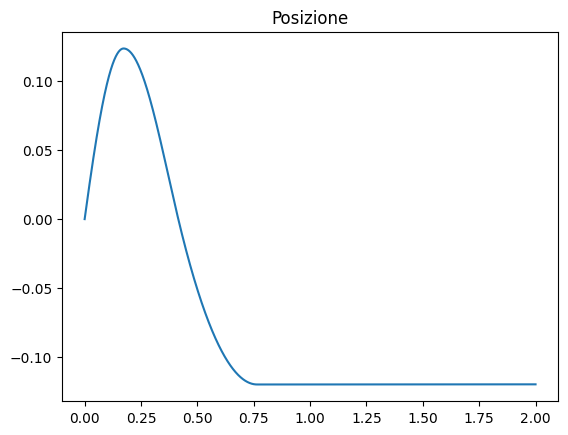

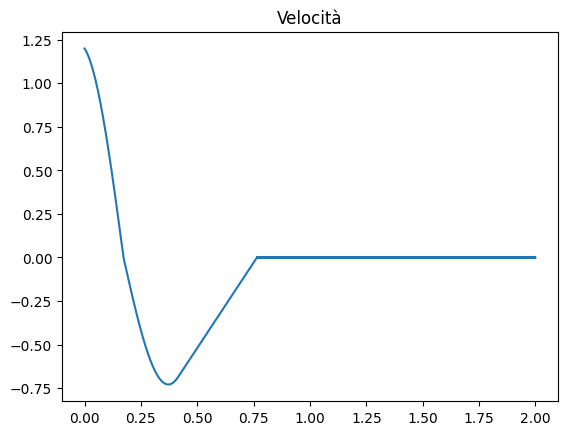

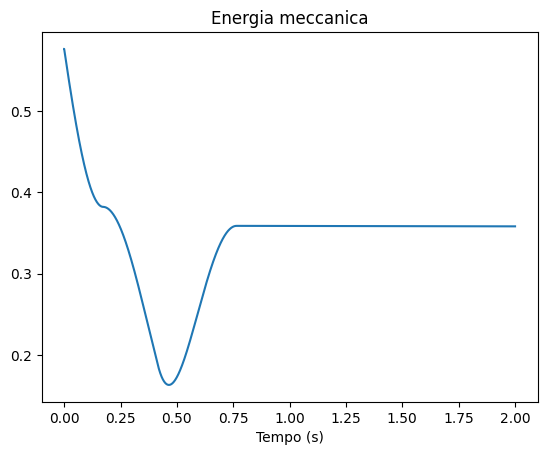

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dati del problema (SI units)
m = 0.80          # massa del blocco in kg
v_A = 1.2         # velocità iniziale del blocco in m/s
k = 50            # costante elastica della molla in N/m
mu_d = 0.20       # coefficiente di attrito dinamico

# Accelerazione gravitazionale
g = 9.81          # m/s^2

ts = [0]
xs = [0]
vels = [v_A]
accs = [0]
E_m = [0.5 * m * v_A**2]
t_max = 2
dt = 0.0001

while ts[-1] < t_max:
    v = vels[-1] + accs[-1]*dt
    x = xs[-1] + v*dt

    # calcolo forza
    if x < 0:
        F_hooke = 0
        energia_potenziale_elastica = 0
    else:
        F_hooke = -k*x
        energia_potenziale_elastica = 0.5 * k * x**2
    F_attrito = - np.sign(vels[-1]) * mu_d*m*g
    F = F_hooke + F_attrito
    energia_cinetica = 0.5 * m * v**2
    energia_potenziale_elastica = 0.5 * k * x**2
    energia_meccanica = energia_cinetica + energia_potenziale_elastica

    # Memorizziamo i risultati
    ts.append(ts[-1] + dt)
    xs.append(x)
    vels.append(v)
    accs.append(F/m)
    E_m.append(energia_meccanica)   ################

plt.figure(1)
plt.plot(ts, xs)
plt.title('Posizione')

plt.figure(2)
plt.plot(ts, vels)
plt.title('Velocità')

plt.figure(3)
plt.plot(ts, E_m)
plt.title('Energia meccanica')

plt.xlabel('Tempo (s)')

a, b, c = -k/2, mu_d*m*g, 0.5*m*v_A**2
x_C = (-b + np.sqrt(b**2 - 4*a*c)) / (2*a)
xD_esatto = -k/2*x_C**2 / mu_d*m*g + x_C
xD_esatto, x_C

## **Esercizio 3**

L'andamento nel tempo della popolazione di una colonia di batteri in una piastra di Petri può essere descritta matematicamente dalla seguente equazione differenziale, detta **equazione logistica**:
$$\frac{dN}{dt} = rN\left(1 - \frac{N}{K}\right)$$
dove $N$ è il numero di batteri al tempo $t$, $r$ è il tasso di crescita e $K$ rappresenta la massima popolazione raggiungibile con queste risorse. Per questo esercizio, considera $K=10^9$, $r=3$ e $N_0=1000$ come valore iniziale di $N$.

- Simula tramite l'algoritmo di Eulero l'andamento di $N$, per un tempo totale $T=10$. Fai un grafico di $N$ in funzione del tempo.

*Suggerimento:* discretizza l'equazione differenziale ($\frac{dN}{dt}\rightarrow\frac{\Delta N}{\Delta t}$) e trova l'equazione per ottenere $N_{i+1}$ a partire da $N_i$.

Text(0, 0.5, '$N(t)$')

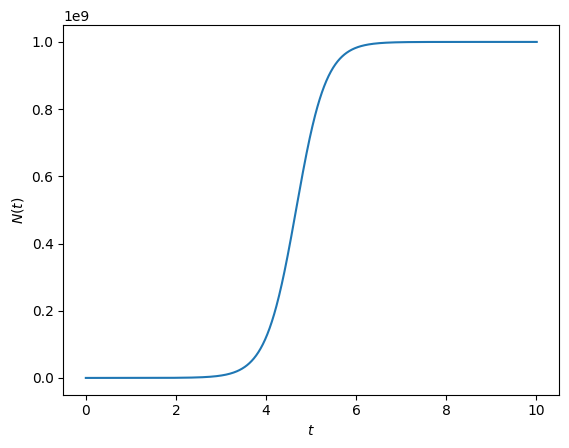

In [17]:
import matplotlib.pyplot as plt
import numpy as np

N0, K, r = 1000, 1E9, 3
t_max = 10

ts = [0]
Ns = [N0]
dt = 0.01

while ts[-1] < t_max:
    N = Ns[-1] + r * Ns[-1] * (1 - Ns[-1]/K) * dt
    t = ts[-1] + dt

    Ns.append(N)
    ts.append(t)

plt.figure(1)
plt.plot(ts, Ns)
plt.xlabel('$t$')
plt.ylabel('$N(t)$')
